<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


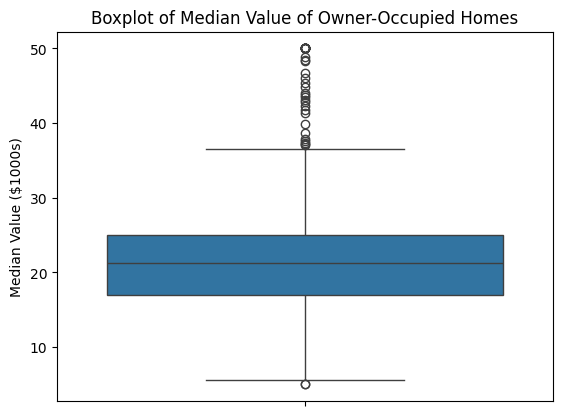

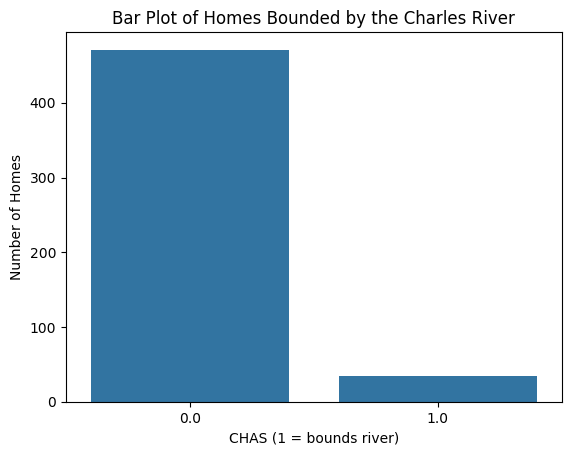

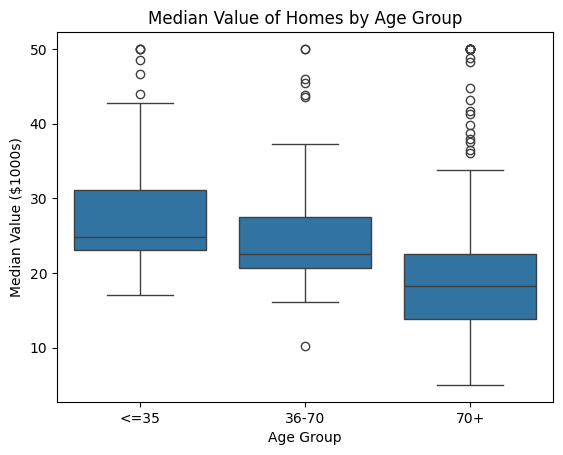

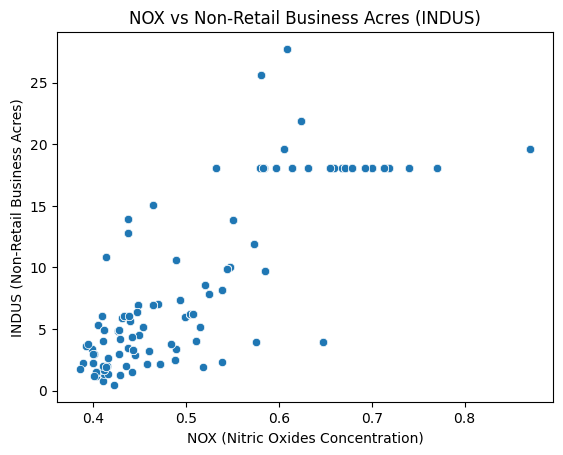

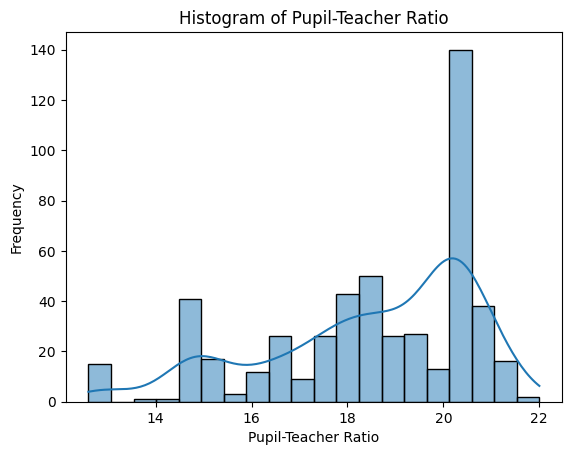

In [7]:
# Descriptive Statistics and Visualizations
# Boxplot for MEDV
sns.boxplot(y='MEDV', data=boston_df)
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.ylabel('Median Value ($1000s)')
pyplot.show()

# Bar plot for CHAS (Charles River)
sns.countplot(x='CHAS', data=boston_df)
pyplot.title('Bar Plot of Homes Bounded by the Charles River')
pyplot.xlabel('CHAS (1 = bounds river)')
pyplot.ylabel('Number of Homes')
pyplot.show()

# Discretize AGE into categories
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '36-70', '70+'])

# Boxplot: MEDV vs AGE_GROUP
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
pyplot.title('Median Value of Homes by Age Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value ($1000s)')
pyplot.show()

# Scatter plot: NOX vs INDUS
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.title('NOX vs Non-Retail Business Acres (INDUS)')
pyplot.xlabel('NOX (Nitric Oxides Concentration)')
pyplot.ylabel('INDUS (Non-Retail Business Acres)')
pyplot.show()

# Histogram for PTRATIO
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
pyplot.title('Histogram of Pupil-Teacher Ratio')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()


In [8]:
# Statistical Tests
# T-Test: Is there a significant difference in MEDV for homes near the Charles River?
river_yes = boston_df[boston_df['CHAS'] == 1]['MEDV']
river_no = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_val = scipy.stats.ttest_ind(river_yes, river_no)
print("T-test result for CHAS and MEDV:")
print(f"T-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")

# ANOVA: MEDV vs AGE_GROUP
model = ols('MEDV ~ C(AGE_GROUP)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA result for AGE_GROUP and MEDV:")
print(anova_table)

# Pearson correlation: NOX and INDUS
corr_coef, p_corr = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("\nPearson correlation between NOX and INDUS:")
print(f"Correlation coefficient: {corr_coef:.4f}, p-value: {p_corr:.4f}")

# Linear regression: DIS and MEDV
X = boston_df[['DIS']]
X = sm.add_constant(X)  # add intercept
y = boston_df['MEDV']
reg_model = sm.OLS(y, X).fit()
print("\nRegression result: DIS vs MEDV")
print(reg_model.summary())


T-test result for CHAS and MEDV:
T-statistic: 3.9964, p-value: 0.0001

ANOVA result for AGE_GROUP and MEDV:
                    sum_sq     df         F        PR(>F)
C(AGE_GROUP)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN

Pearson correlation between NOX and INDUS:
Correlation coefficient: 0.7637, p-value: 0.0000

Regression result: DIS vs MEDV
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 21 May 2025   Prob (F-statistic):           1.21e-08
Time:                        17:28:45   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   